In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
import scipy

**1**. (10 points)

Given the following covariance matrix
```python
A = np.array([[2,1],[1,4]])
```

1. Show that the eigenvectors of $A$ are orthogonal. 
2. What is the vector representing the first principal component direction? 
3. Find $A^{-1}$ without performing a matrix inversion. 
4. What are the coordinates of the data points (0, 1) and (1, 1) in the standard basis expressed as coordinates of the principal components? 
5. What is the proportion of variance explained if we keep only the projection onto the first principal component? 

In [2]:
A = np.array([[2,1],[1,4]])

In [3]:
# Q1
w, v = np.linalg.eig(A) # get eigen vectors of A
np.dot(v[:,0], v[:,1])

0.0

Since the inner product of two eigen vectors is equal to 0, the eigen vectors of A are orthogonal.

The first principal component direction corresponds to the largest eigen value. We can see that the second element in variable w is bigger, so the second eigen vector representing the first principal component direction.

In [4]:
w

array([ 1.58578644,  4.41421356])

In [5]:
# Q2
v[:,1] # This is the vector representing the first principal component direction.

array([-0.38268343, -0.92387953])

In [6]:
# Q3 Find inversed A
transform_A = np.array([[4, -1],[-1, 2]])
A_inverse = 1/np.linalg.det(A)*transform_A
A_inverse

array([[ 0.57142857, -0.14285714],
       [-0.14285714,  0.28571429]])

In [7]:
#Q4
X = np.array([[0,1],[1,1]])
np.dot(v.T, X)

array([[ 0.38268343, -0.5411961 ],
       [-0.92387953, -1.30656296]])

In [8]:
#Q5
w[1]/sum(w)

0.73570226039551578

**2**. (10 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (2 points)

2. Compute the rank of $A$ (use any method you like). (2 points)

3. Find the eigenvalues and eigenvectors of $A$. (2 points)

4. What is the matrix representation of $f$ with respect to the eigenvectors? (4 points)

In [9]:
# Q1
A = np.array([[10, 2, 1], [-10, -5, -4], [16, 20, 13]])
A # A matrix represents the same linear transformation.

array([[ 10,   2,   1],
       [-10,  -5,  -4],
       [ 16,  20,  13]])

In [10]:
# Q2
np.linalg.matrix_rank(A) # rank of matrix A

3

In [11]:
# Q3
w, v = np.linalg.eig(A)

In [12]:
w # eigen value

array([ 9.,  3.,  6.])

In [13]:
v # eigen vector

array([[ 0.57735027,  0.        , -0.12038585],
       [-0.57735027, -0.4472136 , -0.24077171],
       [ 0.57735027,  0.89442719,  0.96308682]])

In [14]:
# Q4
np.linalg.solve(v, A@v)

array([[  9.00000000e+00,   1.72427645e-15,  -5.62692274e-16],
       [  2.57992517e-15,   3.00000000e+00,   1.00959156e-14],
       [  2.94164345e-15,   3.65823681e-15,   6.00000000e+00]])

**3**. (10 points)


- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](figs/vecs.png)

The transformation matrix which rotate the standard vectors by $\theta$ degrees counter-clockwise in 2-D is:
$$
\left[
\begin{matrix}
cos(\theta) & -sin(\theta)\\
sin(\theta) & cos(\theta) \\
\end{matrix}
\right]
$$  
In this problem, the rotate matrix is:

In [15]:
theta = np.pi/6
T = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
T

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

Since one of the coordinate of $e_1$ and $e_2$ are equal to 0, we can use one matrix to represent the transformation.

In [16]:
W = np.array([[3, 0],[0, 0.5]])
A = T@W
A

array([[ 2.59807621, -0.25      ],
       [ 1.5       ,  0.4330127 ]])

In [17]:
# e1 after transformation
e1 = np.array([1,0]).T
e1_trans = A@e1
e1_trans

array([ 2.59807621,  1.5       ])

In [18]:
# e2 after transformation
e2 = np.array([0,1]).T
e2_trans = A@e2
e2_trans

array([-0.25     ,  0.4330127])

The basic idea of the inverse of the transformation we find above is that if it rotates the vector by $\theta$ degree counter-clockwise, we rotate the vector back by $\theta$ degree clockwise. And if we stretch(contract) the vector, we contract(stretch) it. Different from the above, we rotate the vector first and then stretch(contract) it.

In [19]:
theta_inv = -np.pi/6
T_inv = np.array([[np.cos(theta_inv), -np.sin(theta_inv)],
             [np.sin(theta_inv), np.cos(theta_inv)]])
T_inv

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [20]:
W_inv = np.array([[1/3, 0],[0, 1/0.5]])
A_inv = W_inv@T_inv
A_inv

array([[ 0.28867513,  0.16666667],
       [-1.        ,  1.73205081]])

In [21]:
# get original e1 through A_inv
e1_o = A_inv@e1_trans.T
e1_o

array([ 1.,  0.])

In [22]:
# get original e2 through A_inv
e2_o = A_inv@e2_trans.T
e2_o

array([  1.38777878e-17,   1.00000000e+00])

[-0.5, 1.5, -0.5, 1.5]

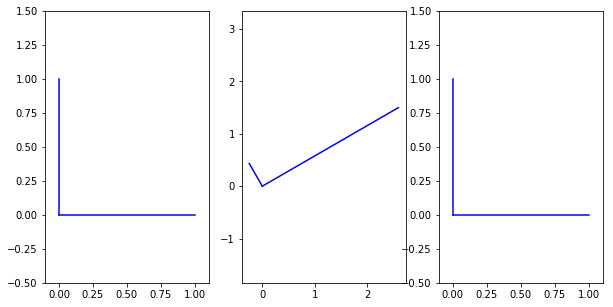

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(*zip(np.zeros_like(e1), e1), 'b-')
plt.plot(*zip(np.zeros_like(e2), e2), 'b-')
plt.axis('equal')
plt.axis([-0.5,1.5,-0.5,1.5])
plt.subplot(1,3,2)
plt.plot(*zip(np.zeros_like(e1_trans), e1_trans), 'b-')
plt.plot(*zip(np.zeros_like(e2_trans), e2_trans), 'b-')
plt.axis([-0.5,4,-0.5,1.5])
plt.axis('equal')
plt.subplot(1,3,3)
plt.plot(*zip(np.zeros_like(e1_o), e1_o), 'b-')
plt.plot(*zip(np.zeros_like(e2_o), e2_o), 'b-')
plt.axis('equal')
plt.axis([-0.5,1.5,-0.5,1.5])

**4**. (30 points)


We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

1. using `scipy.linalg.lstsq` 
2. solving the normal equations $X^TX \beta = X^Ty$ 
3. using `scipy.linalg.svd` 

In each case, plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [24]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [25]:
# Using scipy linalg.lstsq
X = np.c_[x**2, x**3, np.sin(x)]
coef_1 = scipy.linalg.lstsq(X, y)[0]
coef_1

array([  2.99259014,  -0.19883227,  10.20024689])

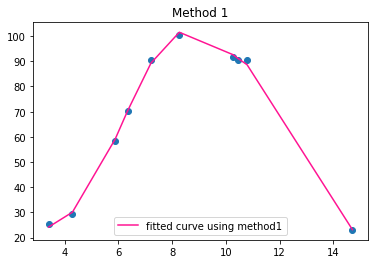

In [26]:
y_1 = X @ coef_1
plt.scatter(x,y)
plt.plot(x, y_1, color = "deeppink", label="fitted curve using method1")
plt.legend(loc="best")
plt.title("Method 1")
pass

In [27]:
# Solving the normal equation 
coef_2 = np.linalg.solve(X.T@X, X.T@y)
coef_2

array([  2.99259014,  -0.19883227,  10.20024689])

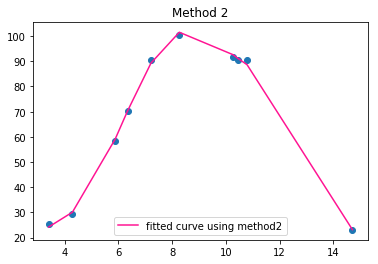

In [28]:
y_2 = X @ coef_2
plt.scatter(x,y)
plt.plot(x, y_2, color = "deeppink", label="fitted curve using method2")
plt.legend(loc="best")
plt.title("Method 2")
pass

In [29]:
# Using scipy.linalg.svd
U, s, V = scipy.linalg.svd(X)
D_ = np.c_[np.diag(1/s), np.zeros((3,7))]
coef_3 = V.T@D_@U.T@y
coef_3

array([  2.99259014,  -0.19883227,  10.20024689])

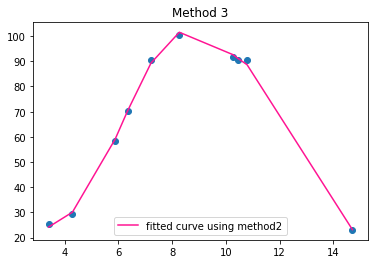

In [30]:
y_3 = X @ coef_3
plt.scatter(x,y)
plt.plot(x, y_3, color = "deeppink", label="fitted curve using method2")
plt.legend(loc="best")
plt.title("Method 3")
pass

**5**. (40 points)

Read in `figs/elephant.jpg` as a gray-scale image. The image has $1066 \times 1600$ values. Using SVD, recreate the image with a relative error of less than 0.5%. What is the relative size of the compressed image as a percentage?

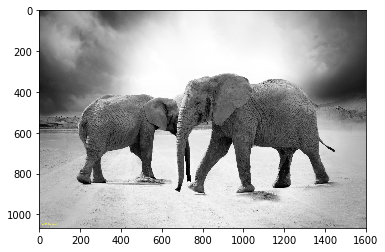

In [31]:
img = io.imread('figs/elephant.jpg', as_gray=True)
plt.imshow(img, cmap='gray')
pass

In [32]:
elephant = img[:,:,0]
U, s, V = np.linalg.svd(elephant)

In [33]:
for i in range(s.shape[0]):
    if np.sum(s[i:]**2)/np.sum(s**2) <= 0.005:
        print(i)
        break

21


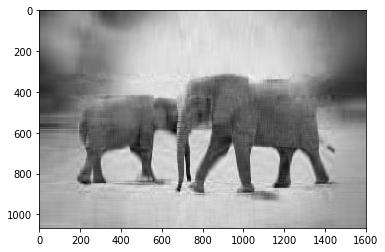

In [34]:
# Recreate the imag
k=21
compress_elephant = U[:,:k]@np.diag(s[:k])@V[:k,:]
plt.imshow(compress_elephant, cmap='gray')
pass

In [35]:
# Relative size 
relative_size = k/len(s)
relative_size

0.019699812382739212